# Neural Nets: Convolution

In this lab we try to build a model to detect handwritten digits. This lab should introduce you in the use of keras and should enable you to build and train your own CNNs.

In [1]:

# imports
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# nn
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

# image manipulation
import cv2

%matplotlib inline

C:\Users\awdii\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


First of all, we load our data set that is devided into a training and a testing set.

In [2]:
# load digit dataset with training and test images
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In this data set we have 10 different classes. Each data point in this data set is an image of resoution 28x28 and shows a handwirtten digit.

In [3]:
nb_classes = 10
# dimension
img_rows, img_cols = x_train[0].shape
print('number of rows: ' + str(img_rows) + '; number of cols: ' + str(img_cols))

number of rows: 28; number of cols: 28


## greyscale visualization

(60000, 28, 28)
7


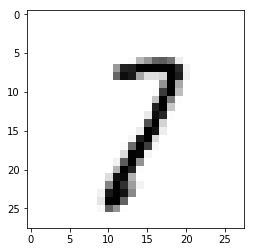

In [4]:
print(x_train.shape)
image_index = 7770 #You may select anything up to 60,000
print(y_train[image_index]) #
plt.imshow(x_train[image_index], cmap='Greys')

To get a better feeling for the data we take a look at the first 10 instances.

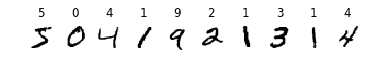

number of train images: 60000


In [5]:
# The data consists of images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset. For all images, we know which digit they represent: it is given in the 'target' of
# the dataset.
num_to_show = 10
for i in range(num_to_show):
    image = x_train[i]
    label = y_train[i]
    plt.subplot(2, num_to_show, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(str(label))
plt.show()

# print some statistics
print('number of train images: ' + str(len(x_train)))

<b>Exercise 1:</b>  
Create a histogram showing the class distribution.

Text(0,0.5,'Number of images')

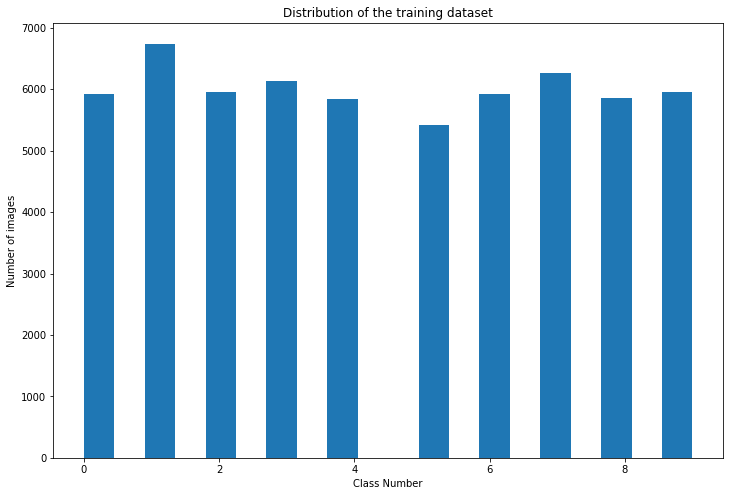

In [6]:
# YOUR CODE GOES HERE
plt.figure(figsize=(12,8))
plt.hist(y_train,bins=20)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")

We have to reshape the training and test data so that a model created by keras can handle it. We do so by just adding an extra dimension.

In [7]:
# transform data set
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

<b>Simple Neural Model</b>

Our first simple model is a neural net with one hidden layer consisting of 512 hidden units and a ReLU activation function. To prevent overfitting a dropout layer is added after that. The input for this net is an image that is converted to a flat vector in the first layer. Please have a look at the architecture and try to understand the structure of this neural net.

In [8]:
def getSimpleModel():
    # simple model with dense layers
    simpleModel = Sequential()
    simpleModel.add(Flatten(input_shape=input_shape))
    simpleModel.add(Dense(512, activation='relu'))
    simpleModel.add(Dropout(0.2))
    simpleModel.add(Dense(nb_classes, activation='softmax'))

    simpleModel.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return simpleModel

simpleModel = getSimpleModel()
simpleModel.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


<b>Simple Convolutional Neural Net</b>

The second neural net we are using is a convolutional neural net. This network consists of a convolutional layer a max pooling layer and a dense layer in the end. 

In [9]:
# simple cnn
def getCNNModel():
    nb_filters_one = 32
    nb_filters_two = 64
    nb_conv = 3
    nb_pool = 2
    dense_size = 128
    cnnModel = Sequential()
    cnnModel.add(Conv2D(nb_filters_one, kernel_size=(nb_conv, nb_conv),
                     activation='relu',
                     input_shape=input_shape))
    cnnModel.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    cnnModel.add(Dropout(0.25))
    cnnModel.add(Flatten())
    cnnModel.add(Dense(dense_size, activation='relu'))
    cnnModel.add(Dropout(0.5))
    cnnModel.add(Dense(nb_classes, activation='softmax'))

    cnnModel.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return cnnModel

cnnModel = getCNNModel()
cnnModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

<b>Exercise 2:</b>  
Compare the two different network architectures. What can you say about the number of trainable parameters? Which neural net will probably work better?

<b>Your answer:</b>  
<b>CNN: first add the convotional layer con2D(),we use this function because you're working with images. we add The ReLU activation function, The next layer is a hidden layer with Dense (512) that has a relu activation function and the last layer is an output layer with Dense (10) that has a softmax activation function, which is needed for this multi-class classification problem.</b>
<b>ANN : we have the input layer and one hidden layer with Dense (512) that has a relu activation function and the last layer is an output layer with dense (10) that has a softmax activation function.</b>
<b>the difference between the two model is the conventional layer added in CNN</b>
<b>the number of the trainable parameters in the CNN (693,962) is bigger that the number in the ANN (407,050) and that due to to the one more layer of CNN.</b>
<b>CNN will work better because reducing the complexity of the model (faster training, needs fewer samples, reduces the chance of overfitting).</b>

To use the integer label for the neural net training we have to encode them in a one-hot-encoding way.

In [10]:
oneHotLabelTrain = np_utils.to_categorical(y_train, nb_classes)
oneHotLabelTest  = np_utils.to_categorical(y_test,  nb_classes)

Now we can train both models and save the training and testing accuracies for the different epochs in a callback. This can really take some time.

In [ ]:
batch_size = 128
numEpochs =10
simpleModel = getSimpleModel()
learnHistSimple = simpleModel.fit(x_train,oneHotLabelTrain,validation_data=(x_test,oneHotLabelTest),
                                  batch_size=batch_size,
                                  epochs=numEpochs)
cnnModel = getCNNModel()
learnHistCNN    = cnnModel.fit(x_train,oneHotLabelTrain,validation_data=(x_test,oneHotLabelTest),
                                  batch_size=batch_size,
                                  epochs=numEpochs)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 458us/step - loss: 12.9450 - acc: 0.1961 - val_loss: 12.8571 - val_acc: 0.2021
Epoch 2/10
60000/60000 [==============================] - 34s 565us/step - loss: 12.3394 - acc: 0.2340 - val_loss: 12.6543 - val_acc: 0.2148
Epoch 3/10
60000/60000 [==============================] - 38s 633us/step - loss: 12.1173 - acc: 0.2480 - val_loss: 12.2133 - val_acc: 0.2417
Epoch 4/10
 5888/60000 [=>............................] - ETA: 32s - loss: 12.2688 - acc: 0.2386

<b>Exercise 3:</b>  
Plot the learning curves for the two neural nets, showing the training and testing loss over the number of epochs. What are the learning curves telling you?

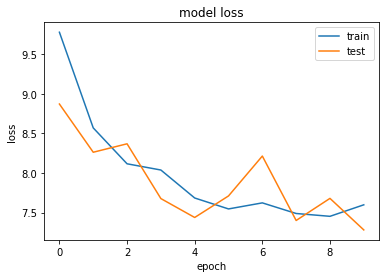

In [13]:
# YOUR CODE GOES HERE
#print(learnHistCNN.history.keys())
# trainig and testing loss for learnHistCNN 
plt.plot(learnHistSimple.history['loss'])
plt.plot(learnHistSimple.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

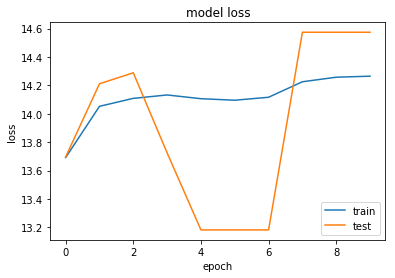

In [14]:
#training and testing loss for learnHistCNN
plt.plot(learnHistCNN.history['loss'])
plt.plot(learnHistCNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

<b>Excercise 4:</b>

Normalize the input data so that all values are between 0 and 1. After that, retrain the simple model. Are the results better? Can you explain the results?

Min-max normalization retains the original distribution of scores except for a scaling factor and transforms all the scores into a common range [0, 1]. However, this method is not robust (i.e., the method is highly sensitive to outliers.

In [15]:
# YOUR CODE GOES HERE

# normalize images
x_train_rescaled = x_train/255
x_test_rescaled = x_test/255
#another way
#from keras.utils import normalize
#x_train_rescaled=normalize(x_train,axis=-1,order=2)
# retrain model
batch_size = 128
simpleModel = getSimpleModel()
learnHistSimple = simpleModel.fit(x_train_rescaled,oneHotLabelTrain,validation_data=(x_test_rescaled,oneHotLabelTest),
                                  batch_size=batch_size,
                                  epochs=10)
x_train_rescaled=(x_train-x_train.min())/(x_train.max()-x_train.min())

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 215us/step - loss: 1.1206 - acc: 0.7283 - val_loss: 0.5971 - val_acc: 0.8669
Epoch 2/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.5490 - acc: 0.8589 - val_loss: 0.4316 - val_acc: 0.8902
Epoch 3/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.4459 - acc: 0.8782 - val_loss: 0.3720 - val_acc: 0.9021
Epoch 4/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.3981 - acc: 0.8898 - val_loss: 0.3384 - val_acc: 0.9087
Epoch 5/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.3675 - acc: 0.8966 - val_loss: 0.3166 - val_acc: 0.9133
Epoch 6/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.3442 - acc: 0.9031 - val_loss: 0.3008 - val_acc: 0.9168
Epoch 7/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.3284 - acc: 0.9069 - val_loss: 0.

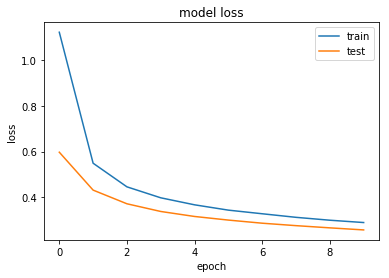

In [16]:
plt.plot(learnHistSimple.history['loss'])
plt.plot(learnHistSimple.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

<b>Excercise 5:</b>
    
Write a function that randomly places the digits from the input data on a 2-dimensional image of size 28x28. Do this by firstly resizing the image to the size 14x14 and than placing this digit on a grid of 28x28. After that the data set should look like shown in the image above.

<img src="files/non-centered.png",width=600,height=600>

<b>Hint</b>: Maybe the function cv2.resize(...) could be helpful.

In [13]:
def add_random_noise(inputData):
    out_data = np.zeros(inputData.shape)
    # YOUR CODE GOES HERE
    for i in range(inputData.shape[0]):
        small=cv2.resize(inputData[i,:,:,0],None,fx=0.5,fy=0.5)
        k=np.int(np.fix(small.shape[0]*np.random.rand()))
        out_data[i,k:k+small.shape[0],k:k+small.shape[1],0]=small
    return out_data

In [18]:
#another way
def add_random_noise(inputData):
    out_data = np.zeros(inputData.shape)
    for i in range(inputData.shape[0]):
        x,y=np.random.randint(low=0,high=14,size=2)
        out_data[i,x:(x+14),y:(y+14),0]=cv2.resize(inputData[i,:,:,:],(14,14))
    return out_data

In [7]:
import numpy as np
x,y=np.random.randint(low=0,high=14,size=2)


1

Now we can have a look at the new data set of non-centered digits.

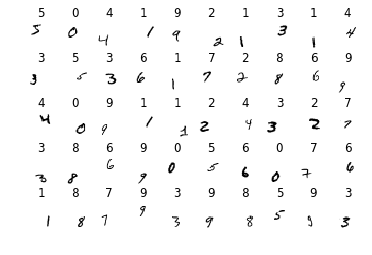

In [23]:
# try to create a more realistic data set
x_train_non_centered = add_random_noise(x_train)
x_test_non_centered = add_random_noise(x_test)

for i in range(50):
    image = x_train_non_centered[i]
    image = image.reshape([img_rows,img_cols])
    label = y_train[i]
    plt.subplot(5, 10, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(label)
plt.show()


# scale data
x_train_non_centered /= 255.
x_test_non_centered /= 255.

if K.image_data_format() == 'channels_first':
    x_train_non_centered = x_train_non_centered.reshape(x_train_non_centered.shape[0], 1, img_rows, img_cols)
    x_test_non_centered = x_test_non_centered.reshape(x_test_non_centered.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train_non_centered = x_train_non_centered.reshape(x_train_non_centered.shape[0], img_rows, img_cols, 1)
    x_test_non_centered = x_test_non_centered.reshape(x_test_non_centered.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


<b>Excercise 6:</b>
    
Train the simple nn and the cnn on this new data set for 10 epochs and compare the trainng and testing results with each other. What conclusions can you draw?

In [ ]:
batch_size = 128
numsEpochs=10
# YOUR CODE GOES HERE
simpleModel = getSimpleModel()
cnnModel = getCNNModel()
learnHistSimple = simpleModel.fit(x_train_non_centered,oneHotLabelTrain,validation_data=(x_test_non_centered,oneHotLabelTest),
                                  batch_size=batch_size,
                                  epochs=numEpochs)
learnHistCNN = cnnModel.fit(x_train_non_centered,oneHotLabelTrain,validation_data=(x_test_non_centered,oneHotLabelTest),
                                  batch_size=batch_size,
                                  epochs=numEpochs)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 263us/step - loss: 13.7943 - acc: 0.1397 - val_loss: 13.1777 - val_acc: 0.1773
Epoch 2/10
60000/60000 [==============================] - 11s 190us/step - loss: 12.7823 - acc: 0.2029 - val_loss: 12.4503 - val_acc: 0.2242
Epoch 3/10
60000/60000 [==============================] - 11s 190us/step - loss: 12.2411 - acc: 0.2368 - val_loss: 12.1061 - val_acc: 0.2466
Epoch 4/10
60000/60000 [==============================] - 11s 191us/step - loss: 12.0657 - acc: 0.2478 - val_loss: 11.7843 - val_acc: 0.2643
Epoch 5/10
60000/60000 [==============================] - 12s 201us/step - loss: 11.7274 - acc: 0.2684 - val_loss: 11.6047 - val_acc: 0.2742
Epoch 6/10
60000/60000 [==============================] - 12s 193us/step - loss: 11.3545 - acc: 0.2901 - val_loss: 11.2708 - val_acc: 0.2957
Epoch 7/10
60000/60000 [==============================] - 12s 196us/step - loss: 10.9312 - acc: 0.3159 -

<b>Additional Excercise</b>

Try to build a model that is able to get better classification results on the non-centered data set.